In [78]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

sns.set(
font_scale=1.2
)

In [5]:
conversion_data = pd.read_csv('conversion.csv')

In [18]:
conversion_data

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710001,8,2


In [17]:
conversion_data.nunique()

ad_id                  1143
xyz_campaign_id           3
fb_campaign_id          691
age                       4
gender                    2
interest                 40
Impressions            1130
Clicks                  183
Spent                   869
Total_Conversion         32
Approved_Conversion      16
dtype: int64

In [7]:
conversion_data.isna().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

1143

## Постройте график распределения числа показов (Impressions) для каждой рекламы, прологарифмировав значения.

In [24]:
impr = data \
    .groupby('fb_campaign_id', as_index=False) \
    .agg({'Impressions':'sum'}) \
    .rename(columns={'Impressions':'Sum_Impressions'})

In [50]:
impr['Sum_Impressions'] = impr['Sum_Impressions'].apply(lambda x: np.log(x))

<AxesSubplot:xlabel='Sum_Impressions', ylabel='Count'>

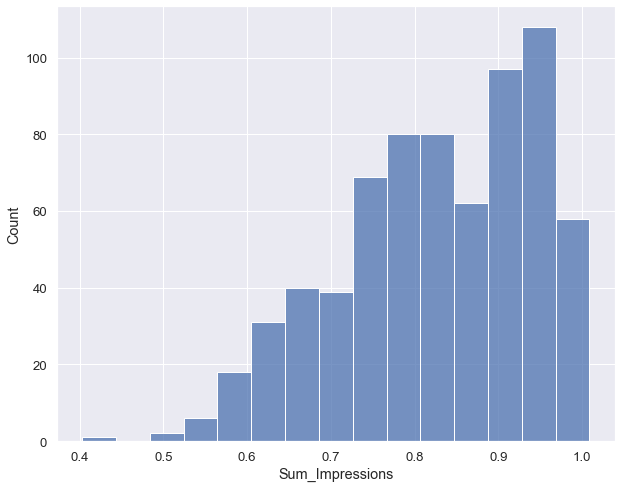

In [49]:
plt.figure(figsize=(10, 8))
sns.histplot(data=impr, x=impr['Sum_Impressions'])

## Создайте новую колонку c CTR. Посмотрите на описательные статистики и распределение.

In [51]:
conversion_data

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710001,8,2


In [52]:
conversion_data["CTR"] = conversion_data.Clicks / conversion_data.Impressions

In [56]:
conversion_data.CTR.describe()

count    1143.000000
mean        0.000164
std         0.000115
min         0.000000
25%         0.000100
50%         0.000160
75%         0.000234
max         0.001059
Name: CTR, dtype: float64

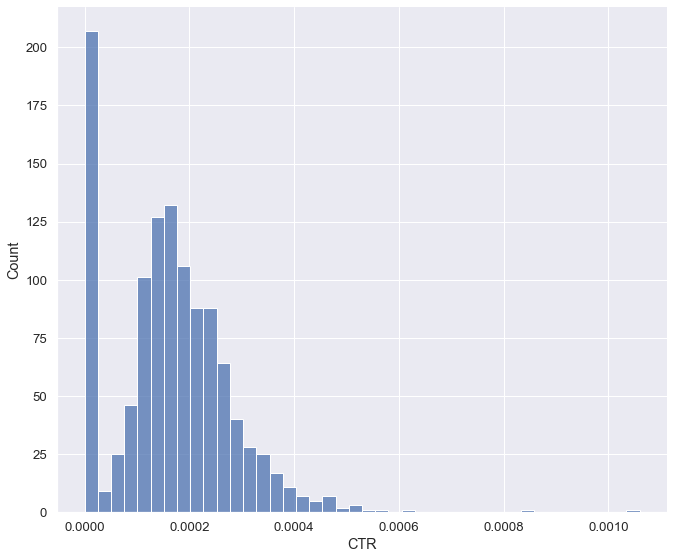

In [60]:
sns.displot(data=conversion_data, x='CTR', height=8, aspect=1.2)

In [54]:
conversion_data \
    .query('CTR == CTR.max()')

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR
150,738637,936,109857,45-49,F,24,944,1,1.42,1,0,0.001059


## Проанализируйте CTR с разбивкой по рекламной кампании.



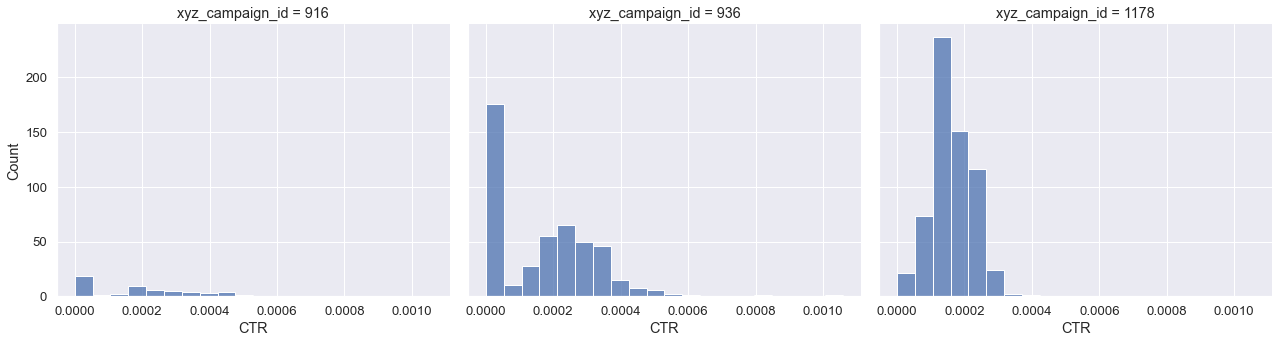

In [68]:
sns.displot(data=conversion_data, x='CTR', height=5, aspect=1.2, col='xyz_campaign_id', bins=20)

## Посчитайте стоимость за клик пользователя по объявлению (CPC). Изучите полученные значения, используя меры центральной тенденции и меры изменчивости.


In [69]:
conversion_data["CPC"] = conversion_data.Spent / conversion_data.Clicks

In [70]:
conversion_data.CPC.describe()

count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
Name: CPC, dtype: float64

In [71]:
1.644364-1.390000

0.25436400000000003

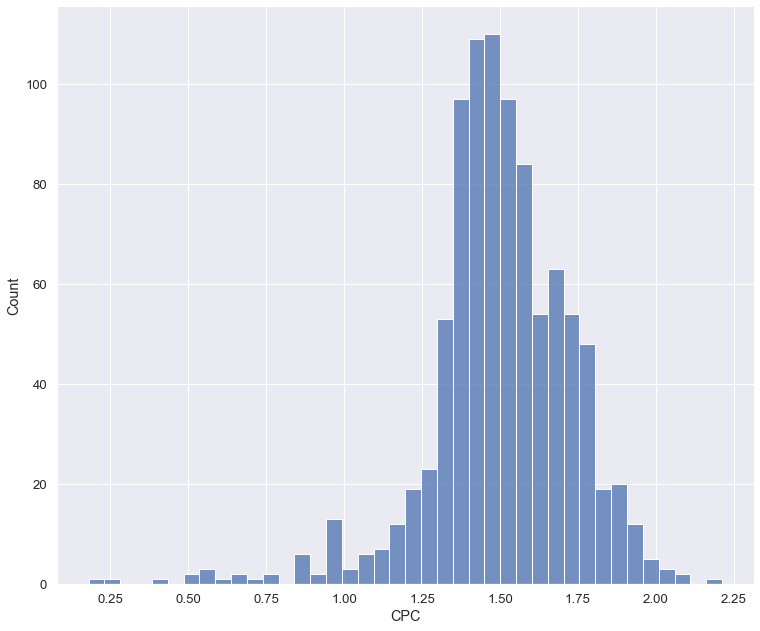

In [83]:
sns.displot(data=conversion_data, x=conversion_data.CPC.dropna(), height=9, aspect=1.2)

In [80]:
st.iqr(conversion_data.CPC, nan_policy='omit')

0.2543636990499998

## Визуализируйте CPC с разбивкой по полу пользователей, которым были показаны объявления. 

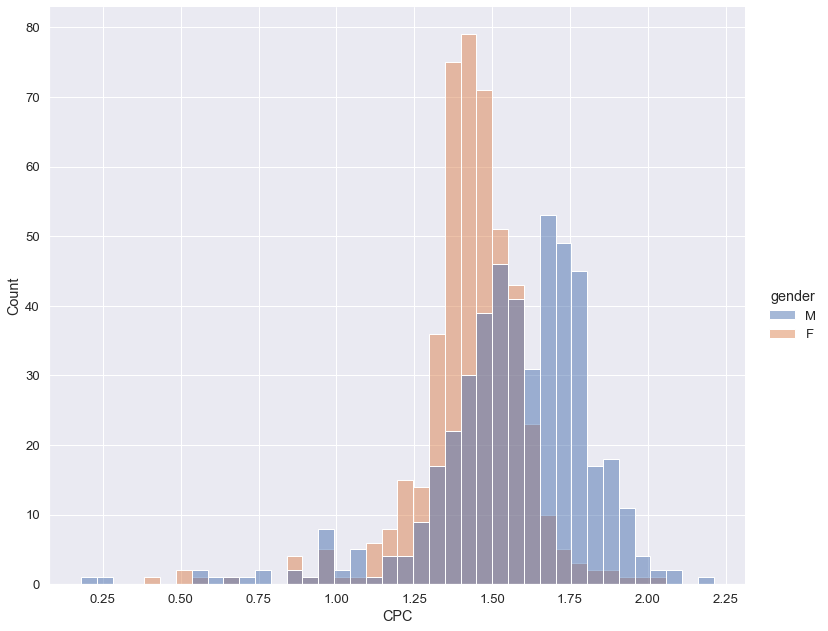

In [86]:
sns.displot(data=conversion_data, 
            x=conversion_data.CPC.dropna(), 
            height=9, 
            aspect=1.2, 
            hue='gender')

## Посчитайте конверсию из клика в покупку

In [87]:
conversion_data["CR"] = conversion_data.Approved_Conversion / conversion_data.Clicks

In [90]:
conversion_data \
    .query('ad_id == 1121814') \
    .CR

860    0.030879
Name: CR, dtype: float64